# Data Augmentation

# 1. Settings

In [1]:
#!pip install Augmentor

In [2]:
import Augmentor
import os
import glob
import cv2
import matplotlib.pyplot as plt 
from zipfile import ZipFile
from os.path import basename

In [3]:
IMAGESDIR="Images/"

In [4]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

In [5]:
import datetime
now = datetime.datetime.now()
print("Today =", now)

Today = 2021-10-06 10:59:39.699604


# 2. Initial images

In [6]:
currentdir = os.getcwd()
currentdir

'C:\\Users\\seretkow\\MachineLearningNotebooks\\CNI'

In [7]:
count=0
for root, _, files in os.walk(IMAGESDIR):
    count=count+len(files)
print("Total images =", count)

Total images = 10


In [8]:
def imageview(filename):
    imgdisplay = cv2.imread(filename)
    print('Image:', filename, 'Image Size:', imgdisplay.shape)
    plt.figure(figsize=(5, 5)) 
    image_rgb2 = cv2.cvtColor(imgdisplay, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb2)

Image: Images\CNI (1).jpg Image Size: (1080, 1339, 3)
Image: Images\CNI (10).jpg Image Size: (932, 1400, 3)
Image: Images\CNI (2).jpg Image Size: (441, 600, 3)
Image: Images\CNI (3).jpg Image Size: (676, 925, 3)
Image: Images\CNI (4).jpg Image Size: (576, 1024, 3)
Image: Images\CNI (5).jpg Image Size: (379, 474, 3)
Image: Images\CNI (6).jpg Image Size: (1200, 1600, 3)
Image: Images\CNI (7).jpg Image Size: (283, 400, 3)
Image: Images\CNI (8).jpg Image Size: (423, 600, 3)
Image: Images\CNI (9).jpg Image Size: (445, 700, 3)


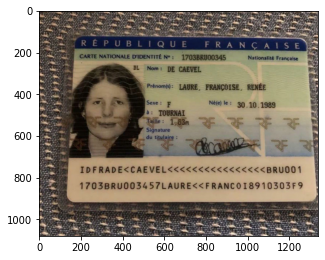

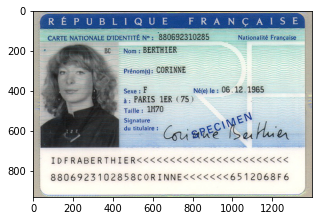

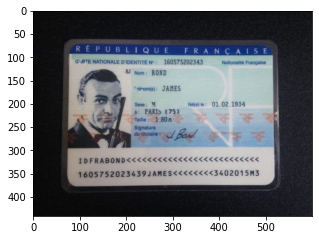

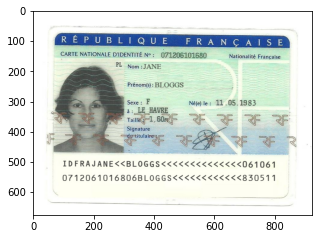

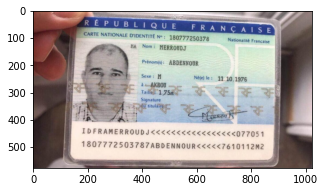

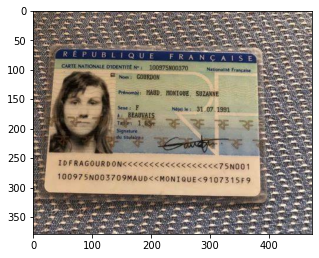

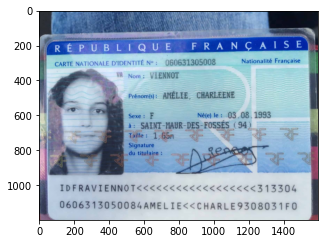

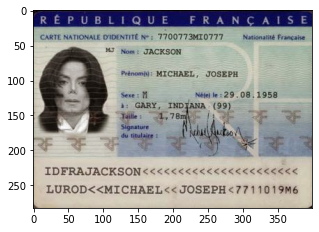

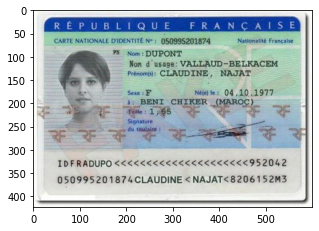

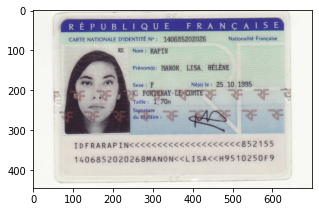

In [9]:
i=1
folderlen=len(IMAGESDIR)
for img in glob.glob(IMAGESDIR + "/*.jpg"):
    if i <=count:
        imageview(img)
        i+=1

# 3. EDA on Initial images

  0%|          | 0/10 [00:00<?, ?it/s]


found 10 images.
Using 8 threads. (max:8)



100%|██████████| 10/10 [00:03<00:00,  3.04it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  10

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  283
max height                               |  1200
mean height                              |  643.5
median height                            |  510

min width                                |  400
max width                                |  1600
mean width                               |  906.2
median width                             |  812

mean height/width ratio                  |  0.7101081438975944
median height/width ratio                |  0.6280788177339901
recommended input size(by mean)          |  [640 904] (h x w, multiples of 8)
recommended input size(by mean)          |  [640 912] (h x w, multiples of 16)
recommended input size(by mean)     

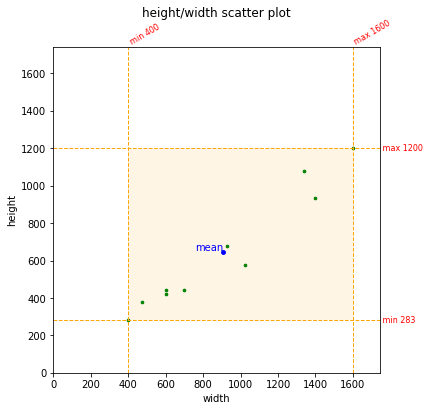

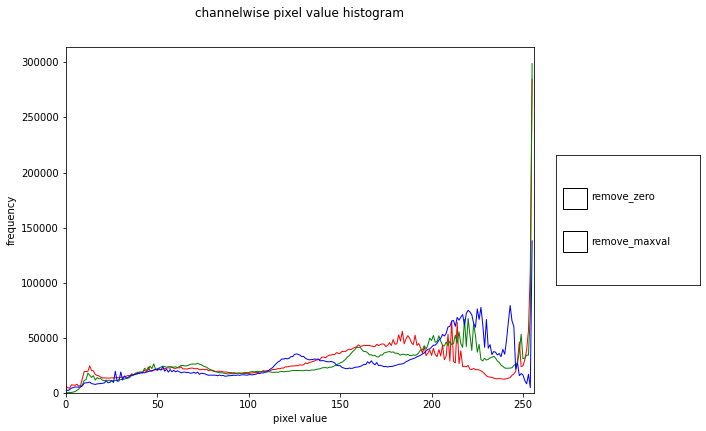

In [10]:
from basic_image_eda import BasicImageEDA

if __name__ == "__main__":  # for multiprocessing
    
    extensions = ['png', 'jpg', 'jpeg']
    threads = 0
    dimension_plot = True
    channel_hist = True
    nonzero = False
    hw_division_factor = 1.0

    BasicImageEDA.explore(IMAGESDIR, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

# 4. Data Augmentation

In [11]:
p = Augmentor.Pipeline(IMAGESDIR)

p.rotate(probability=0.3, max_left_rotation=5, max_right_rotation=5)
p.shear(probability=0.5, max_shear_left=0.2, max_shear_right=0.1)
p.crop_centre(probability=0.5, percentage_area=0.95)

p.sample(50)

Executing Pipeline:   0%|          | 0/50 [00:00<?, ? Samples/s]

Initialised with 10 image(s) found.
Output directory set to Images/output.

Processing <PIL.Image.Image image mode=RGB size=570x418 at 0x1FB5426DF10>: 100%|██████████| 50/50 [00:01<00:00, 38.80 Samples/s]                    


In [12]:
p.status()

Operations: 3
	0: RotateRange (probability=0.3 max_left_rotation=-5 max_right_rotation=5 )
	1: Shear (probability=0.5 max_shear_left=0.2 max_shear_right=0.1 )
	2: CropPercentage (probability=0.5 percentage_area=0.95 centre=True randomise_percentage_area=False )
Images: 10
Classes: 1
	Class index: 0 Class label: Images 
Dimensions: 10
	Width: 400 Height: 283
	Width: 925 Height: 676
	Width: 700 Height: 445
	Width: 1339 Height: 1080
	Width: 600 Height: 441
	Width: 1024 Height: 576
	Width: 474 Height: 379
	Width: 1400 Height: 932
	Width: 600 Height: 423
	Width: 1600 Height: 1200
Formats: 1
	 JPEG

You can remove operations using the appropriate index and the remove_operation(index) function.


# 5. Data Augmentation results

In [13]:
count=0
for root, _, files in os.walk('Images/output'):
    count=count+len(files)
print("Total new images generated =", count)

Total new images generated = 50


Image: Images/output\Images_original_CNI (1).jpg_10331e24-0424-425b-89ea-955a8e105188.jpg Image Size: (1026, 1272, 3)
Image: Images/output\Images_original_CNI (1).jpg_b603e351-fa86-4dd3-8cd5-9233ea4dbb97.jpg Image Size: (1080, 1339, 3)
Image: Images/output\Images_original_CNI (1).jpg_bd3361c6-85ff-45ff-a537-eb004ef0ccfd.jpg Image Size: (1080, 1339, 3)
Image: Images/output\Images_original_CNI (1).jpg_d59fbbda-0e9c-4e48-a0ec-95a420028e2e.jpg Image Size: (1080, 1339, 3)
Image: Images/output\Images_original_CNI (1).jpg_d81c6bee-9ab1-452f-8b50-47b83ec861eb.jpg Image Size: (1026, 1272, 3)


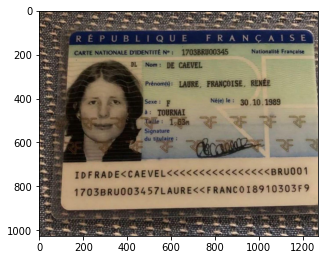

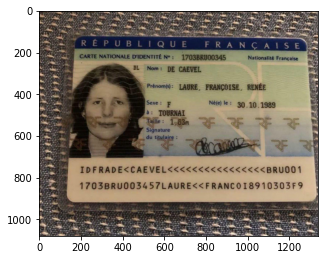

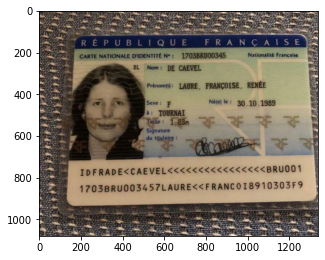

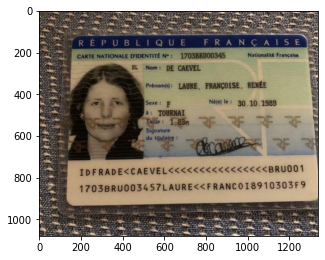

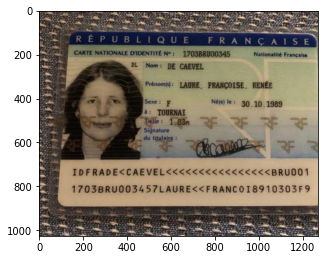

In [14]:
i=1
folderlen=len('Images/output')
for img in glob.glob('Images/output' + "/*.jpg"):
    if i <=5:
        imageview(img)
        i+=1

  0%|          | 0/50 [00:00<?, ?it/s]


found 50 images.
Using 8 threads. (max:8)



100%|██████████| 50/50 [00:04<00:00, 10.56it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  50

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  283
max height                               |  1200
mean height                              |  622.46
median height                            |  548

min width                                |  400
max width                                |  1600
mean width                               |  874.78
median width                             |  878

mean height/width ratio                  |  0.7115617641006883
median height/width ratio                |  0.6241457858769932
recommended input size(by mean)          |  [624 872] (h x w, multiples of 8)
recommended input size(by mean)          |  [624 880] (h x w, multiples of 16)
recommended input size(by mean)   

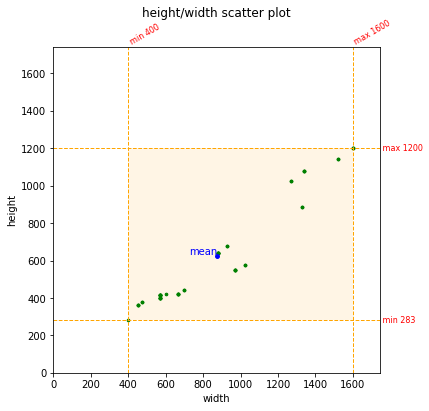

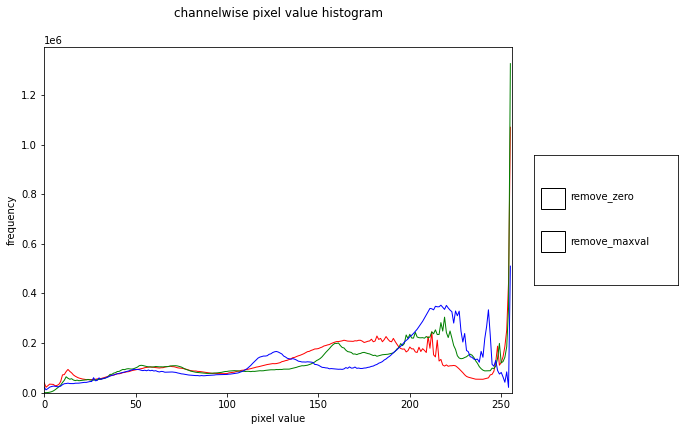

In [15]:
from basic_image_eda import BasicImageEDA

if __name__ == "__main__":  # for multiprocessing
    
    extensions = ['png', 'jpg', 'jpeg']
    threads = 0
    dimension_plot = True
    channel_hist = True
    nonzero = False
    hw_division_factor = 1.0

    BasicImageEDA.explore('Images/output', extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

# 6. Zipping images files

In [19]:
ZIPFILENAME='augmentedimages.zip'

with ZipFile(ZIPFILENAME, 'w') as zipObj:
   # Iterate over all the files in directory
   for folderName, subfolders, filenames in os.walk(IMAGESDIR):
       for filename in filenames:
           #create complete filepath of file in directory
           filePath = os.path.join(folderName, filename)
           # Add file to zip
           zipObj.write(filePath, basename(filePath))

if os.path.exists(ZIPFILENAME):
  print("OK: Zip file has been created.")
else:
  print("Error: Zip file does not exist.")

OK: Zip file has been created.


> End